In [79]:
import pandas as pd
from nile_EMODPS_framework.model.model_nile import ModelNile
from tqdm import tqdm
import time
import numpy as np

grouped = ["Baseline_grouped", "120Hurst_grouped"][0]
opt_results = pd.read_csv(f"../outputs{grouped}/baseline_results.csv").drop(columns="Unnamed: 0")
policies, objectives = opt_results.iloc[:, :-4], opt_results.iloc[:, -4:]

grouped2 = ["Baseline_grouped", "120Hurst_grouped"][1]
opt_results = pd.read_csv(f"../outputs{grouped}/baseline_results.csv").drop(columns="Unnamed: 0")
policies2, objectives2 = opt_results.iloc[:, :-4], opt_results.iloc[:, -4:]

In [80]:
modelBaselineToBaseline = ModelNile(grouped, 0.02, 0.01, 0.004, 0.5, 0.5)
modelBaselineToHurst = ModelNile(grouped2, 0.02, 0.01, 0.004, 1, 5)
modelHurstToHurst = ModelNile(grouped2, 0.02, 0.01, 0.004, 1, 5)
modelHurstToBaseline = ModelNile(grouped, 0.02, 0.01, 0.004, 0.5, 0.5)
models = [modelBaselineToBaseline, modelBaselineToHurst, modelHurstToHurst, modelHurstToBaseline]

In [61]:
def testModelForScenario(model, policies, number):
    rewards = []
    for trace in tqdm(range(0, 100)):
        reward = model.evaluate(policies.iloc[number].to_numpy(), trace)
        rewards.append(reward)
    
    return rewards

# Test baseline to baseline 

In [62]:
t0 = time.time()

rewardsEthiopia = testModelForScenario(modelBaselineToBaseline, policies, 21)
print("Average Ethiopia: ", np.mean(rewardsEthiopia, axis=0))
rewardsPercentile = testModelForScenario(modelBaselineToBaseline, policies, 3)
print("Average Percentile: ", np.mean(rewardsPercentile, axis=0))
rewardsAbsolute = testModelForScenario(modelBaselineToBaseline, policies, 14)
print("Average Absolute: ", np.mean(rewardsAbsolute, axis=0))

t1 = time.time()
print(t1 - t0)

100%|██████████| 100/100 [47:54<00:00, 28.74s/it]


Average Ethiopia:  [ 2.22628944  0.13795833  1.26941145 15.20816706]


100%|██████████| 100/100 [48:00<00:00, 28.80s/it]


Average Percentile:  [ 2.62359587  0.27304167  0.44236226 15.15930818]


100%|██████████| 100/100 [1:10:49<00:00, 42.49s/it]

Average Percentile:  [ 1.74466452  0.19095833  0.32273224 15.14516386]
10004.140099048615


# Test baseline to Hurst

In [65]:
t0 = time.time()

rewardsEthiopia2 = testModelForScenario(modelBaselineToHurst, policies, 21)
print("Average Ethiopia: ", np.mean(rewardsEthiopia2, axis=0))
rewardsPercentile2 = testModelForScenario(modelBaselineToHurst, policies, 3)
print("Average Percentile: ", np.mean(rewardsPercentile2, axis=0))
rewardsAbsolute2 = testModelForScenario(modelBaselineToHurst, policies, 14)
print("Average Absolute: ", np.mean(rewardsAbsolute2, axis=0))

t1 = time.time()
print(t1 - t0)

100%|██████████| 100/100 [45:55<00:00, 27.56s/it]


Average Ethiopia:  [ 2.55834012  0.18308333  1.27497396 15.10750736]


100%|██████████| 100/100 [47:44<00:00, 28.65s/it]


Average Percentile:  [ 3.09342971  0.304       0.44342636 15.05833452]


100%|██████████| 100/100 [48:40<00:00, 29.20s/it]

Average Absolute:  [ 2.12935349  0.23075     0.33556674 15.04516007]
8541.201077222824


# Test Hurst to Baseline

In [66]:
t0 = time.time()

rewardsEthiopia3 = testModelForScenario(modelHurstToBaseline, policies2, 8)
print("Average Ethiopia: ", np.mean(rewardsEthiopia3, axis=0))
rewardsPercentile3 = testModelForScenario(modelHurstToBaseline, policies2, 14)
print("Average Percentile: ", np.mean(rewardsPercentile3, axis=0))
rewardsAbsolute3 = testModelForScenario(modelHurstToBaseline, policies2, 17)
print("Average Absolute: ", np.mean(rewardsAbsolute3, axis=0))

t1 = time.time()
print(t1 - t0)

100%|██████████| 100/100 [46:36<00:00, 27.97s/it]


Average Ethiopia:  [ 3.27794158  0.322625    0.60304967 15.17547402]


100%|██████████| 100/100 [46:14<00:00, 27.75s/it]


Average Percentile:  [ 1.74629003  0.19083333  0.32200701 15.14515349]


100%|██████████| 100/100 [46:28<00:00, 27.89s/it]

Average Absolute:  [ 2.42764426  0.23704167  1.22627554 15.20059302]
8360.77913069725


# Test Hurst to Hurst

In [67]:
t0 = time.time()

rewardsEthiopia4 = testModelForScenario(modelHurstToHurst, policies2, 8)
print("Average Ethiopia: ", np.mean(rewardsEthiopia4, axis=0))
rewardsPercentile4 = testModelForScenario(modelHurstToHurst, policies2, 14)
print("Average Percentile: ", np.mean(rewardsPercentile4, axis=0))
rewardsAbsolute4 = testModelForScenario(modelHurstToHurst, policies2, 17)
print("Average Absolute: ", np.mean(rewardsAbsolute4, axis=0))

t1 = time.time()
print(t1 - t0)

100%|██████████| 100/100 [45:59<00:00, 27.59s/it]


Average Ethiopia:  [ 3.74697701  0.33933333  0.60447851 15.07444285]


100%|██████████| 100/100 [45:58<00:00, 27.58s/it]


Average Percentile:  [ 2.13227584  0.23066667  0.33568853 15.04501221]


100%|██████████| 100/100 [46:08<00:00, 27.69s/it]

Average Absolutei t:  [ 2.84973024  0.27133333  1.2245643  15.09971851]
8286.746891260147


In [81]:
avg_eth1 = [ 2.22628944,  0.13795833,  1.26941145, 15.20816706]
avg_perc1 = [ 2.62359587,  0.27304167, 0.44236226, 15.15930818]
avg_abs1 = [ 1.74466452,  0.19095833,  0.32273224, 15.14516386]

first = [avg_eth1, avg_perc1, avg_abs1]

avg_eth2 = [ 2.55834012,  0.18308333,  1.27497396, 15.10750736]
avg_perc2 = [ 3.09342971,  0.304,       0.44342636, 15.05833452]
avg_abs2 = [ 2.12935349,  0.23075,     0.33556674, 15.04516007]

second = [avg_eth2, avg_perc2, avg_abs2]

avg_eth3 = [ 3.27794158,  0.322625,    0.60304967, 15.17547402]
avg_perc3 =  [ 1.74629003,  0.19083333,  0.32200701, 15.14515349]
avg_abs3 = [ 2.42764426,  0.23704167,  1.22627554, 15.20059302]

third = [avg_eth3, avg_perc3, avg_abs3]

avg_eth4 = [ 3.74697701,  0.33933333,  0.60447851, 15.07444285]
avg_perc4 = [ 2.13227584,  0.23066667,  0.33568853, 15.04501221]
avg_abs4 = [ 2.84973024,  0.27133333,  1.2245643, 15.09971851]

forth = [avg_eth4, avg_perc4, avg_abs4]

allRewards = [avg_eth1, avg_perc1, avg_abs1, avg_eth2, avg_perc2, avg_abs2, avg_eth3, avg_perc3, avg_abs3, avg_eth4, avg_perc4, avg_abs4]

In [82]:
array = np.array(allRewards)
min_v = array.min(axis=0)
max_v = array.max(axis=0)
normalized = (array - min_v) / (max_v - min_v)

first = np.array(first - min_v) / (max_v - min_v)
second = np.array(second - min_v) / (max_v - min_v)
third = np.array(third - min_v) / (max_v - min_v)
forth = np.array(forth - min_v) / (max_v - min_v)

print(first)

# first[:, 3] = 1 - first[:, 3]
# second[:, 3] = 1 - second[:, 3]
# third[:, 3] = 1 - third[:, 3]
# forth[:, 3] = 1 - forth[:, 3]

first[:, :3] = 1 - first[:, :3]
second[:, :3] = 1 - second[:, :3]
third[:, :3] = 1 - third[:, :3]
forth[:, :3] = 1 - forth[:, :3]

print(first)



[[2.40534343e-01 0.00000000e+00 9.94162956e-01 1.00000000e+00]
 [4.38958132e-01 6.70804916e-01 1.26295303e-01 7.00536760e-01]
 [0.00000000e+00 2.63190565e-01 7.61023244e-04 6.13844149e-01]]
[[0.75946566 1.         0.00583704 1.        ]
 [0.56104187 0.32919508 0.8737047  0.70053676]
 [1.         0.73680944 0.99923898 0.61384415]]


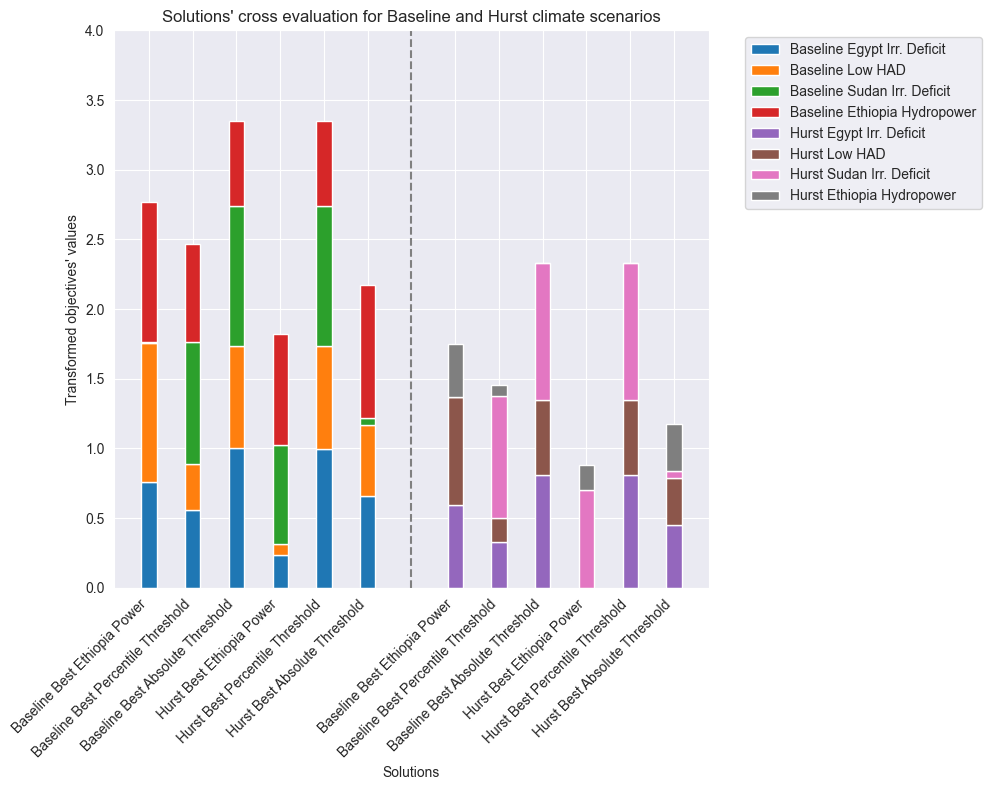

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for the first chart
categories = ['Baseline Best Ethiopia Power', 'Baseline Best Percentile Threshold', 'Baseline Best Absolute Threshold', 
              'Hurst Best Ethiopia Power', 'Hurst Best Percentile Threshold', 'Hurst Best Absolute Threshold']
subcategory1 = np.append(first[:, 0], third[:, 0])
subcategory2 = np.append(first[:, 1], third[:, 1])
subcategory3 = np.append(first[:, 2], third[:, 2])
subcategory4 = np.append(first[:, 3], third[:, 3])

subcategory5 = np.append(second[:, 0], forth[:, 0])
subcategory6 = np.append(second[:, 1], forth[:, 1])
subcategory7 = np.append(second[:, 2], forth[:, 2])
subcategory8 = np.append(second[:, 3], forth[:, 3])

# Define the position of bars on X-axis
bar_width = 0.35
bar_positions = np.arange(len(categories))
bar_positions2 = np.arange(len(categories)) + len(categories) + 1  # Offset for the second chart

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot first chart
p1 = ax.bar(bar_positions, subcategory1, bar_width, label='Baseline Egypt Irr. Deficit', bottom= 0)
p2 = ax.bar(bar_positions, subcategory2, bar_width, label='Baseline Low HAD', bottom= subcategory1)
p3 = ax.bar(bar_positions, subcategory3, bar_width, label='Baseline Sudan Irr. Deficit', bottom= subcategory1 + subcategory2)
p4 = ax.bar(bar_positions, subcategory4, bar_width, label='Baseline Ethiopia Hydropower', bottom= subcategory1 + subcategory2 + subcategory3)


# Plot second chart
p5 = ax.bar(bar_positions2, subcategory5, bar_width, label='Hurst Egypt Irr. Deficit', bottom = 0)
p6 = ax.bar(bar_positions2, subcategory6, bar_width, label='Hurst Low HAD', bottom = subcategory5)
p7 = ax.bar(bar_positions2, subcategory7, bar_width, label='Hurst Sudan Irr. Deficit', bottom = subcategory5 + subcategory6)
p8 = ax.bar(bar_positions2, subcategory8, bar_width, label='Hurst Ethiopia Hydropower', bottom = subcategory5 + subcategory6 + subcategory7)

# Draw a vertical line between the two charts
plt.axvline(x=len(categories) , color='gray', linestyle='--')

# Labeling the X and Y axis
ax.set_xlabel('Solutions')
ax.set_ylabel('Transformed objectives\' values')
ax.set_title('Solutions\' cross evaluation for Baseline and Hurst climate scenarios')

# Set ticks and labels for the first chart
ax.set_xticks(np.concatenate([bar_positions, bar_positions2]))
ax.set_xticklabels(2 * categories, rotation=45, ha='right')

# Adding the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.ylim(bottom=0, top=4)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()


plt.savefig("eval_bars.svg", bbox_inches="tight")
# Display the plot
plt.show()

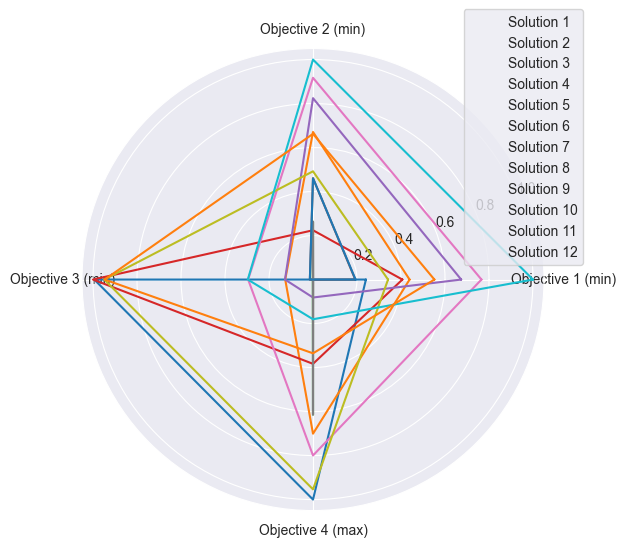

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Number of variables we're plotting.
num_vars = normalized.shape[1]

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for idx, solution in enumerate(normalized):
    values = solution.tolist()
    values += values[:1]
    ax.fill(angles, values, alpha=0.0, label=f'Solution {idx+1}')
    ax.plot(angles, values)

# Add the labels
labels = ['Objective 1 (min)', 'Objective 2 (min)', 'Objective 3 (min)', 'Objective 4 (max)']
plt.xticks(angles[:-1], labels)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


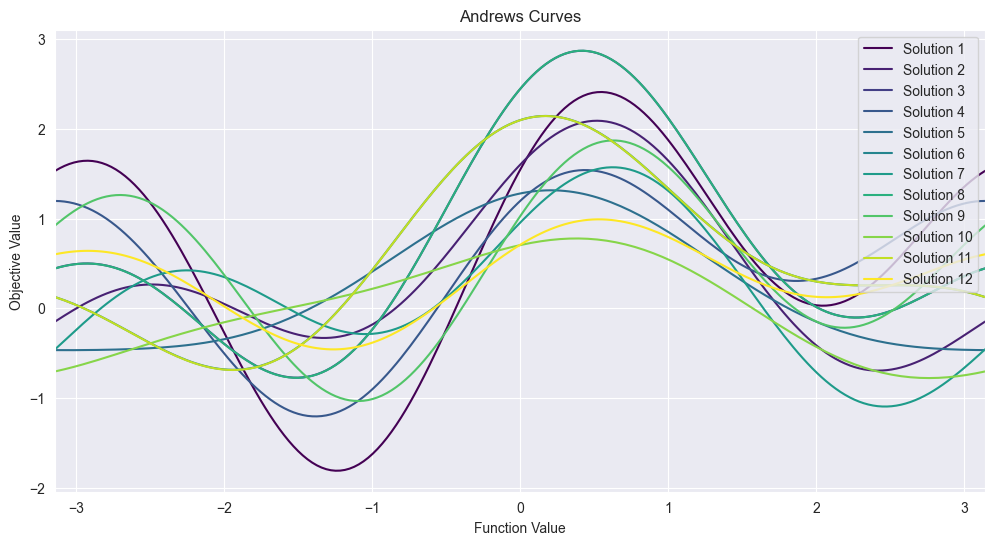

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves

# Create a DataFrame with the data and a label column
df = pd.DataFrame(normalized, columns=['Objective 1 (min)', 'Objective 2 (min)', 'Objective 3 (min)', 'Objective 4 (max)'])
df['Solution'] = ['Solution {}'.format(i+1) for i in range(normalized.shape[0])]

# Plot using Andrews curves
plt.figure(figsize=(12, 6))
andrews_curves(df, 'Solution', colormap='viridis')
plt.title('Andrews Curves')
plt.xlabel('Function Value')
plt.ylabel('Objective Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


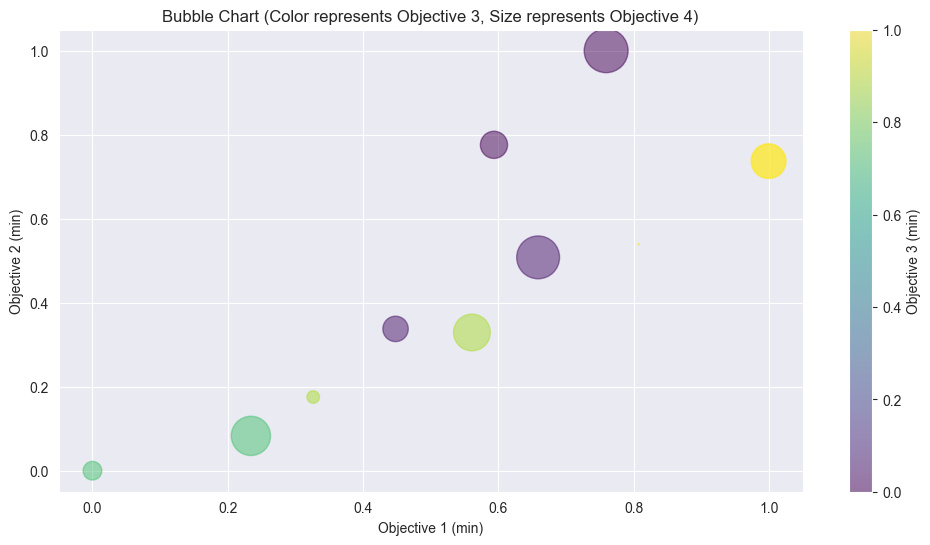

In [10]:
import matplotlib.pyplot as plt

# Plot the bubble chart
plt.figure(figsize=(12, 6))
bubble_size = normalized[:, 3] * 1000  # Scale the bubble size for better visualization

plt.scatter(normalized[:, 0], normalized[:, 1], s=bubble_size, alpha=0.5, c=normalized[:, 2], cmap='viridis')
plt.xlabel('Objective 1 (min)')
plt.ylabel('Objective 2 (min)')
plt.title('Bubble Chart (Color represents Objective 3, Size represents Objective 4)')
plt.colorbar(label='Objective 3 (min)')
plt.show()


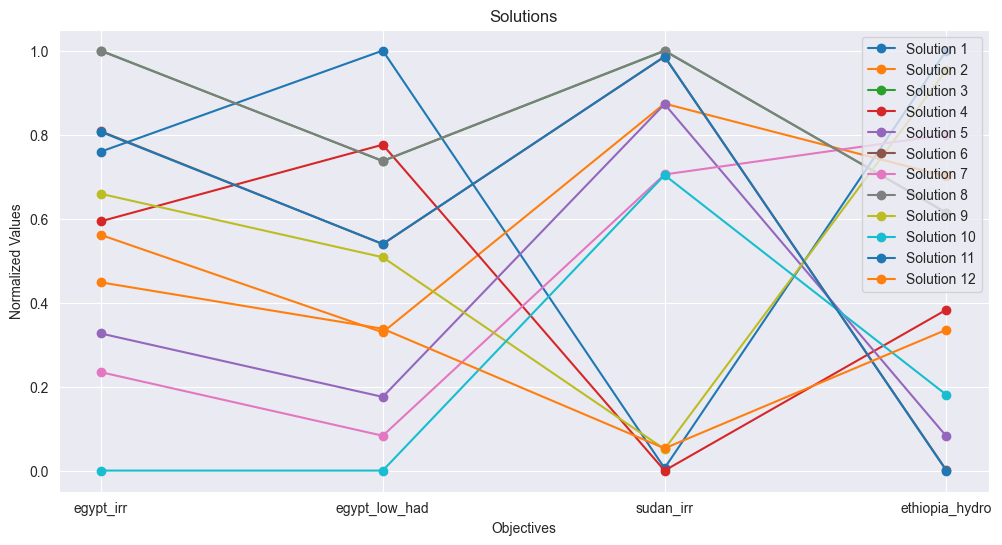

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the data
df = pd.DataFrame(normalized, columns=['egypt_irr',  'egypt_low_had', 'sudan_irr',   'ethiopia_hydro'])

# Plot the line plot
plt.figure(figsize=(12, 6))
for i in range(len(df)):
    plt.plot(df.columns, df.iloc[i], marker='o', label=f'Solution {i+1}')

plt.title('Solutions')
plt.xlabel('Objectives')
plt.ylabel('Normalized Values')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

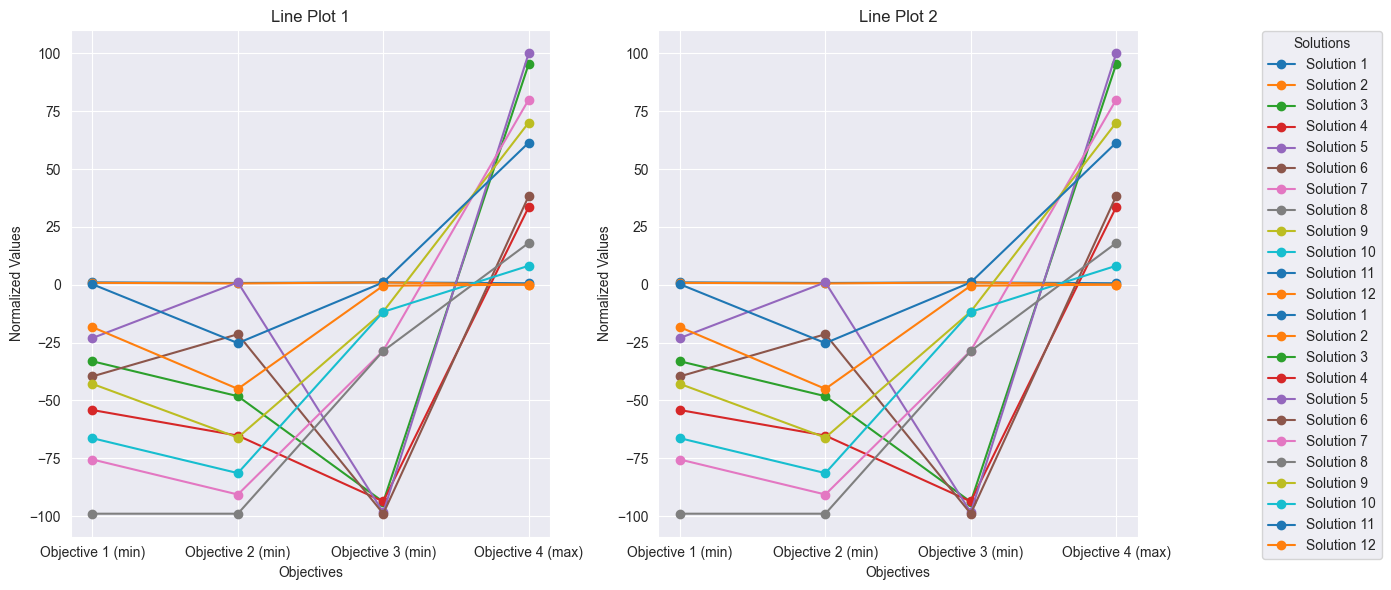

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = np.array([
    [0.00000000e+00, 2.63190565e-01, 7.61027130e-04, 6.13844155e-01],
    [1.92122343e-01, 4.60790399e-01, 1.42289699e-02, 9.06248743e-04],
    [3.41095479e+01, 4.92033933e+01, 9.48898098e+01, 9.53577610e+01],
    [5.51894733e+01, 6.62321539e+01, 9.47102396e+01, 3.35302934e+01],
    [2.40534341e+01, 0.00000000e+00, 9.94162954e+01, 1.00000000e+02],
    [4.06367938e+01, 2.24084420e+01, 1.00000000e+02, 3.83041925e+01],
    [7.65753133e+01, 9.17028761e+01, 2.94913331e+01, 7.99619572e+01],
    [1.00000000e+02, 1.00000000e+02, 2.96412699e+01, 1.80384725e+01],
    [4.38958129e+01, 6.70804883e+01, 1.26295309e+01, 7.00536752e+01],
    [6.73603744e+01, 8.24539623e+01, 1.27411920e+01, 8.16543761e+00],
    [8.11813283e-01, 2.62569832e+01, 0.00000000e+00, 6.13780588e+01],
    [1.93581829e+01, 4.60376578e+01, 1.43567679e+00, 0.00000000e+00]
])

# Convert minimization objectives to maximization
data[:, 0:3] = 1 - data[:, 0:3]

# Create DataFrame
df = pd.DataFrame(data, columns=['Objective 1 (min)', 'Objective 2 (min)', 'Objective 3 (min)', 'Objective 4 (max)'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot first line plot
for i in range(len(df)):
    ax1.plot(df.columns, df.iloc[i], marker='o', label=f'Solution {i+1}')

ax1.set_title('Line Plot 1')
ax1.set_xlabel('Objectives')
ax1.set_ylabel('Normalized Values')
ax1.grid(True)

# Plot second line plot
for i in range(len(df)):
    ax2.plot(df.columns, df.iloc[i], marker='o', label=f'Solution {i+1}')

ax2.set_title('Line Plot 2')
ax2.set_xlabel('Objectives')
ax2.set_ylabel('Normalized Values')
ax2.grid(True)

# Adjust layout to make room for the legend
fig.tight_layout(rect=[0, 0, 0.85, 1])

# Add legend outside of the plots
fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.5), title='Solutions')

plt.show()
